In [109]:
import os
import polars as pl
import seaborn as sns
from matplotlib import pyplot as plt

In [45]:
csv_files = [file for file in os.listdir() if file.endswith('csv')]
csv_files

['encoding_results_2023-10-13_03-07-14.csv',
 'emissions.csv',
 'encoding_idle_time.csv']

In [46]:
encoding_results: pl.DataFrame = pl.read_csv(csv_files[0])
emissions: pl.DataFrame = pl.read_csv(csv_files[1])
encoding_idle_time: pl.DataFrame = pl.read_csv(csv_files[2])

In [47]:
encoding_results = encoding_results.drop([
    'project_name',
    'run_id', 'country_name',
    'country_iso_code', 'region', 
    'cloud_provider', 'cloud_region',
    'os', 'python_version',
    'codecarbon_version', 
    'longitude', 'latitude',
    'tracking_mode', 'on_cloud',
    'timestamp_duplicated_0', 'duration_duplicated_0',
    ])

In [48]:
encoding_results

,timestamp,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,cpu_energy,gpu_energy,ram_energy,energy_consumed,cpu_count,cpu_model,gpu_count,gpu_model,ram_total_size,host.cpu_percent.mean,host.cpu_percent.min,host.cpu_percent.max,host.cpu_percent.last,host.memory_percent.mean,host.memory_percent.min,host.memory_percent.max,host.memory_percent.last,host.swap_percent.mean,host.swap_percent.min,host.swap_percent.max,host.swap_percent.last,host.memory_used.GiB.mean,host.memory_used.GiB.min,host.memory_used.GiB.max,host.memory_used.GiB.last,host.load_average.1min.mean,host.load_average.1min.min,host.load_average.1min.max,host.load_average.1min.last,…,gpu:1.memory_total.MiB.mean,gpu:1.memory_total.MiB.min,gpu:1.memory_total.MiB.max,gpu:1.memory_total.MiB.last,gpu:1.memory_percent.mean,gpu:1.memory_percent.min,gpu:1.memory_percent.max,gpu:1.memory_percent.last,gpu:1.gpu_utilization.mean,gpu:1.gpu_utilization.min,gpu:1.gpu_utilization.max,gpu:1.gpu_utilization.last,gpu:1.memory_utilization.mean,gpu:1.memory_utilization.min,gpu:1.memory_utilization.max,gpu:1.memory_utilization.last,gpu:1.fan_speed.mean,gpu:1.fan_speed.min,gpu:1.fan_speed.max,gpu:1.fan_speed.last,gpu:1.temperature.mean,gpu:1.temperature.min,gpu:1.temperature.max,gpu:1.temperature.last,gpu:1.power_usage.mean,gpu:1.power_usage.min,gpu:1.power_usage.max,gpu:1.power_usage.last,duration.s,last_timestamp,preset,codec,bitrate,width,height,video_name,output_path
i64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,str,i64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,str,str
0,"""2023-09-29T18:…",6.236857,0.000115,0.000018,205.294077,151.198,377.875335,0.000357,0.000264,0.000647,0.001268,256,"""AMD EPYC 7713 …",2,"""2 x NVIDIA RTX…",1007.667561,1.978338,0.0,3.7,0.0,1.380825,1.3,1.4,1.3,0.0,0.0,0.0,0.0,8.7379,7.998234,8.962353,8.008442,0.713782,0.68,0.74,0.68,…,49140.0,49140.0,49140.0,49140.0,0.9,0.9,0.9,0.9,0.110451,0.0,1.0,1.0,0.0,0.0,0.0,0.0,30.0,30.0,30.0,30.0,35.321197,35.0,36.0,35.0,19.358513,8.197,27.979,20.214,6.235533,1.6960e9,"""faster""","""h264""",145.0,416.0,234.0,"""AncientThought…","""h264/AncientTh…"
1,"""2023-09-29T18:…",6.235156,0.000107,0.000017,204.729853,97.266,377.875335,0.000351,0.000174,0.000647,0.001172,256,"""AMD EPYC 7713 …",2,"""2 x NVIDIA RTX…",1007.667561,1.625634,0.1,3.1,0.1,1.379923,1.3,1.4,1.3,0.0,0.0,0.0,0.0,8.748247,8.035385,8.977695,8.035465,0.641887,0.63,0.68,0.63,…,49140.0,49140.0,49140.0,49140.0,0.9,0.9,0.9,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,30.0,30.0,30.0,35.0,35.0,35.0,35.0,21.991378,19.658,24.973,20.421,6.327652,1.6960e9,"""faster""","""h264""",145.0,416.0,234.0,"""AncientThought…","""h264/AncientTh…"
2,"""2023-09-29T18:…",6.234489,0.000106,0.000017,203.241256,97.176,377.875335,0.000348,0.000168,0.000647,0.001163,256,"""AMD EPYC 7713 …",2,"""2 x NVIDIA RTX…",1007.667561,1.738798,0.4,2.4,1.7,1.391919,1.3,1.4,1.4,0.0,0.0,0.0,0.0,8.883196,8.062706,9.028725,8.86031,0.748755,0.74,0.76,0.76,…,49140.0,49140.0,49140.0,49140.0,0.9,0.9,0.9,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,30.0,30.0,30.0,35.0,35.0,35.0,35.0,22.483857,19.753,28.095,19.761,6.242571,1.6960e9,"""faster""","""h264""",145.0,416.0,234.0,"""AncientThought…","""h264/AncientTh…"
3,"""2023-09-29T18:…",6.246922,0.000105,0.000017,190.141209,97.062,377.875335,0.00035,0.000157,0.000649,0.001156,256,"""AMD EPYC 7713 …",2,"""2 x NVIDIA RTX…",1007.667561,1.787124,0.1,2.6,0.1,1.380316,1.3,1.4,1.3,0.0,0.0,0.0,0.0,8.830501,8.121868,9.072525,8.128757,0.78683,0.76,0.88,0.88,…,49140.0,49140.0,49140.0,49140.0,0.9,0.9,0.9,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,30.0,30.0,30.0,34.51498,34.0,35.0,35.0,22.069863,19.56,28.005,20.315,6.291826,1.6960e9,"""faster""","""h264""",365.0,640.0,360.0,"""AncientThought…","""h264/AncientTh…"
4,"""2023-09-29T18:…",6.337089,0.000108,0.000017,193.976296,97.157,377.875

In [49]:
encoding_results.describe()

describe,,timestamp,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,cpu_energy,gpu_energy,ram_energy,energy_consumed,cpu_count,cpu_model,gpu_count,gpu_model,ram_total_size,host.cpu_percent.mean,host.cpu_percent.min,host.cpu_percent.max,host.cpu_percent.last,host.memory_percent.mean,host.memory_percent.min,host.memory_percent.max,host.memory_percent.last,host.swap_percent.mean,host.swap_percent.min,host.swap_percent.max,host.swap_percent.last,host.memory_used.GiB.mean,host.memory_used.GiB.min,host.memory_used.GiB.max,host.memory_used.GiB.last,host.load_average.1min.mean,host.load_average.1min.min,host.load_average.1min.max,…,gpu:1.memory_total.MiB.mean,gpu:1.memory_total.MiB.min,gpu:1.memory_total.MiB.max,gpu:1.memory_total.MiB.last,gpu:1.memory_percent.mean,gpu:1.memory_percent.min,gpu:1.memory_percent.max,gpu:1.memory_percent.last,gpu:1.gpu_utilization.mean,gpu:1.gpu_utilization.min,gpu:1.gpu_utilization.max,gpu:1.gpu_utilization.last,gpu:1.memory_utilization.mean,gpu:1.memory_utilization.min,gpu:1.memory_utilization.max,gpu:1.memory_utilization.last,gpu:1.fan_speed.mean,gpu:1.fan_speed.min,gpu:1.fan_speed.max,gpu:1.fan_speed.last,gpu:1.temperature.mean,gpu:1.temperature.min,gpu:1.temperature.max,gpu:1.temperature.last,gpu:1.power_usage.mean,gpu:1.power_usage.min,gpu:1.power_usage.max,gpu:1.power_usage.last,duration.s,last_timestamp,preset,codec,bitrate,width,height,video_name,output_path
str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,str,str
"""count""",90003.0,"""90003""",90003.0,90003.0,90003.0,90003.0,90003.0,90003.0,90003.0,90003.0,90003.0,90003.0,90003.0,"""90003""",90003.0,"""90003""",90003.0,90003.0,90003.0,90003.0,90003.0,90003.0,90003.0,90003.0,90003.0,90003.0,90003.0,90003.0,90003.0,90003.0,90003.0,90003.0,90003.0,90003.0,90003.0,90003.0,…,90003.0,90003.0,90003.0,90003.0,90003.0,90003.0,90003.0,90003.0,90003.0,90003.0,90003.0,90003.0,90003.0,90003.0,90003.0,90003.0,90003.0,90003.0,90003.0,90003.0,90003.0,90003.0,90003.0,90003.0,90003.0,90003.0,90003.0,90003.0,90003.0,90003.0,"""90003""","""90003""",90003.0,90003.0,90003.0,"""90003""","""90003"""
"""null_count""",0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""",0.0,"""0""",0.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,…,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,"""3""","""3""",3.0,3.0,3.0,"""3""","""3"""
"""mean""",45001.0,null,10.136705,0.000178,0.000017,200.990729,98.234555,377.875335,0.00064,0.000267,0.001053,0.001959,256.0,null,2.0,null,1007.667561,2.458207,0.347399,4.318106,1.545496,1.573707,1.457636,1.608697,1.503229,0.0,0.0,0.0,0.0,10.616442,9.430381,10.973561,9.895418,5.973966,5.48058,6.512286,…,49140.0,49140.0,49140.0,49140.0,0.9,0.9,0.9,0.9,0.003484,0.0,0.033989,0.033822,0.0,0.0,0.0,0.0,30.00002,30.0,30.000178,30.000011,31.979959,31.944156,32.028967,31.999567,21.215589,19.412138,26.53513,20.424242,10.124727,1.6965e9,null,null,4312.916667,1432.0,805.5,null,null
"""std""",25981.772476,null,10.668084,0.000197,5.0594e-7,36.756771,5.992862,0.0,0.000793,0.000269,0.001111,0.002169,0.0,null,0.0,null,0.0,1.42021,0.134956,3.049909,1.249748,0.107636,0.066964,0.119391,0.089663,0.0,0.0,0.0,0.0,1.070464,0.641693,1.167501,0.874027,4.122666,3.750219,4.606661,…,0.0,0.0,0.0,0.0,9.5038e-17,0.0,0.0,0.0,0.018919,0.0,0.181202,0.180772,0.0,0.0,0.0,0.0,0.001948,0.0,0.013332,0.003333,0.154529,0.232985,0.172997,0.132288,0.661508,0.329761,1.548376,1.016959,10.668065,335876.367166,null,null,4644.648796,947.220127,532.811321,null,null
"""min""",0.0,"""2023-09-29T18:…",5.972969,0.000101,0.000014,0.0,42.004,377.875335,0.000282,0.000152,0.000618,0.001105,256.0,"""AMD EPYC 7713 …",2.0,"""2 x NVIDIA RTX…",1007.

In [81]:
preset_partition = encoding_results.partition_by('preset', as_dict=True)

In [82]:
preset_partition.keys()

dict_keys(['faster', 'fast', 'medium', 'slow', 'slower', None])

In [83]:
faster_encoding_results = preset_partition['faster']
fast_encoding_results = preset_partition['fast']
medium_encoding_results = preset_partition['medium']
slow_encoding_results = preset_partition['slow']
slower_encoding_results = preset_partition['slower']

In [88]:
codec_partition = encoding_results.partition_by('codec', as_dict=True)

In [89]:
h264_encoding_results = codec_partition['h264']
h265_encoding_results = codec_partition['h265']

In [123]:
h264_partition = h264_encoding_results.partition_by('preset', as_dict=True)
h264_faster_encoding_results = h264_partition['faster']
h264_fast_encoding_results = h264_partition['fast']
h264_medium_encoding_results = h264_partition['medium']
h264_slow_encoding_results = h264_partition['slow']
h264_slower_encoding_results = h264_partition['slower']

<Figure size 3000x2000 with 0 Axes>

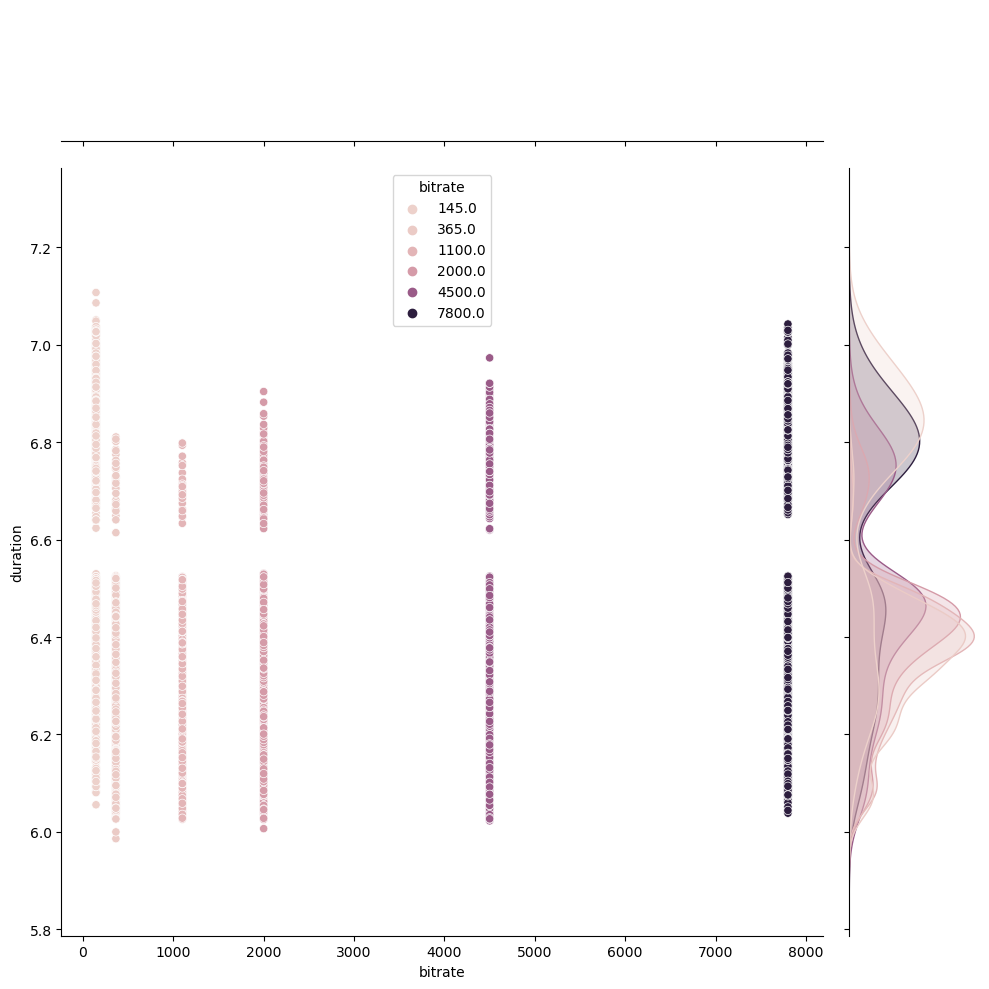

In [138]:
plt.figure(figsize=(30, 20))

# sns.lineplot(
#     data=h264_faster_encoding_results,
#     x='duration', y='cpu_energy', hue='bitrate',
#     )

sns.jointplot(
    data=(
        h264_medium_encoding_results

    ),
    x='bitrate',
    y='duration',
    hue='bitrate',
    height=10
)


<Axes: xlabel='preset', ylabel='gpu_energy'>

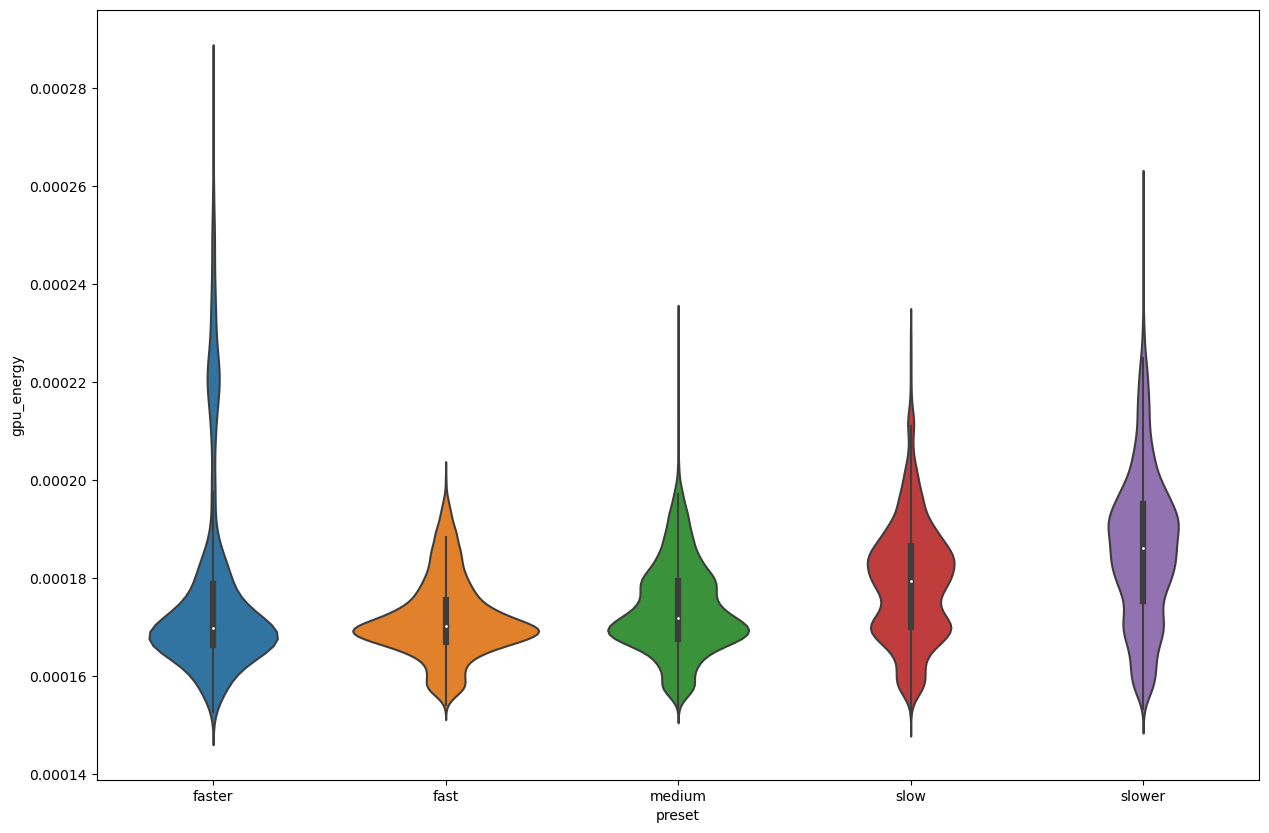

In [191]:
plt.figure(figsize=(15, 10))
# sns.violinplot(h264_encoding_results.filter(pl.col('width') > 640).to_pandas(), x='preset', y='duration')
sns.violinplot(h264_encoding_results.to_pandas(), x='preset', y='gpu_energy')


<Axes: xlabel='preset', ylabel='gpu_energy'>

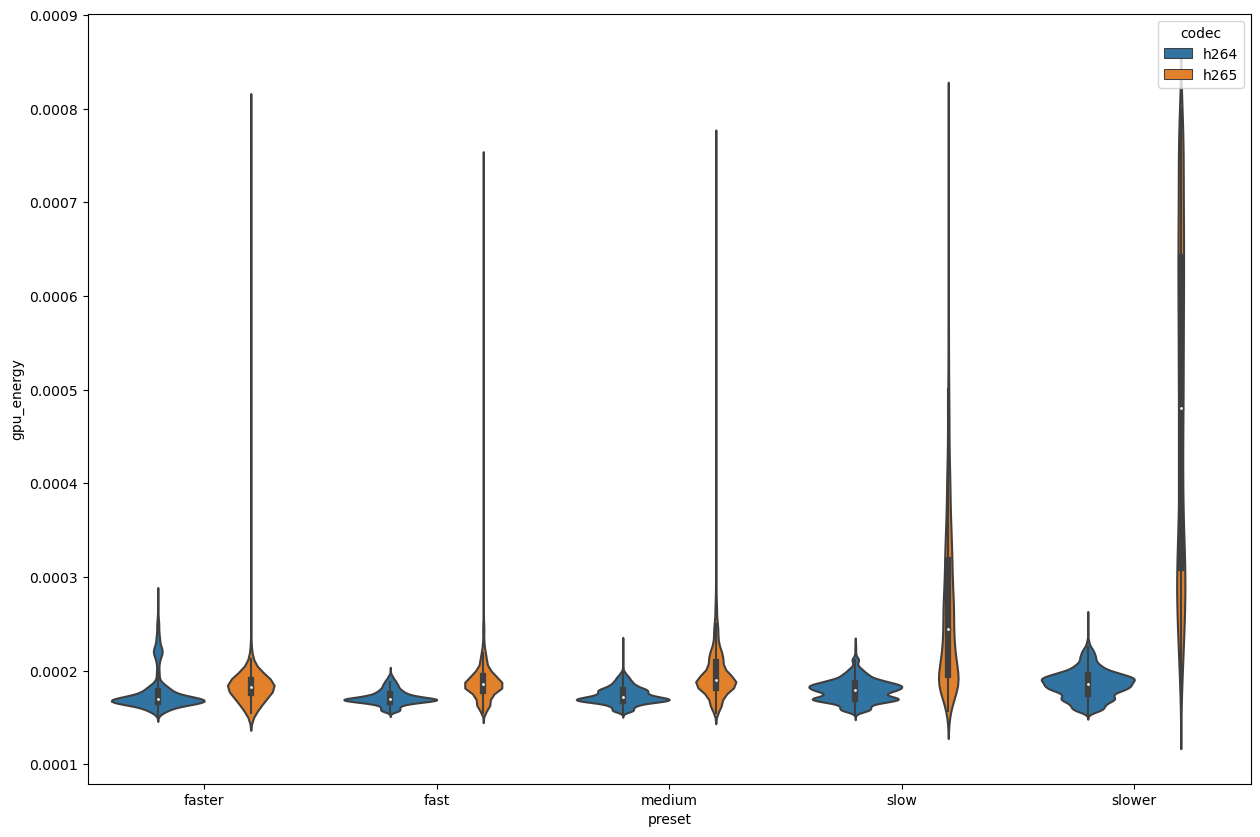

In [198]:
plt.figure(figsize=(15, 10))
sns.violinplot(encoding_results.filter(pl.col('gpu_energy') < 0.0008).to_pandas(), x='preset', y='gpu_energy', hue='codec')

<Axes: xlabel='width', ylabel='gpu:0.gpu_utilization.mean'>

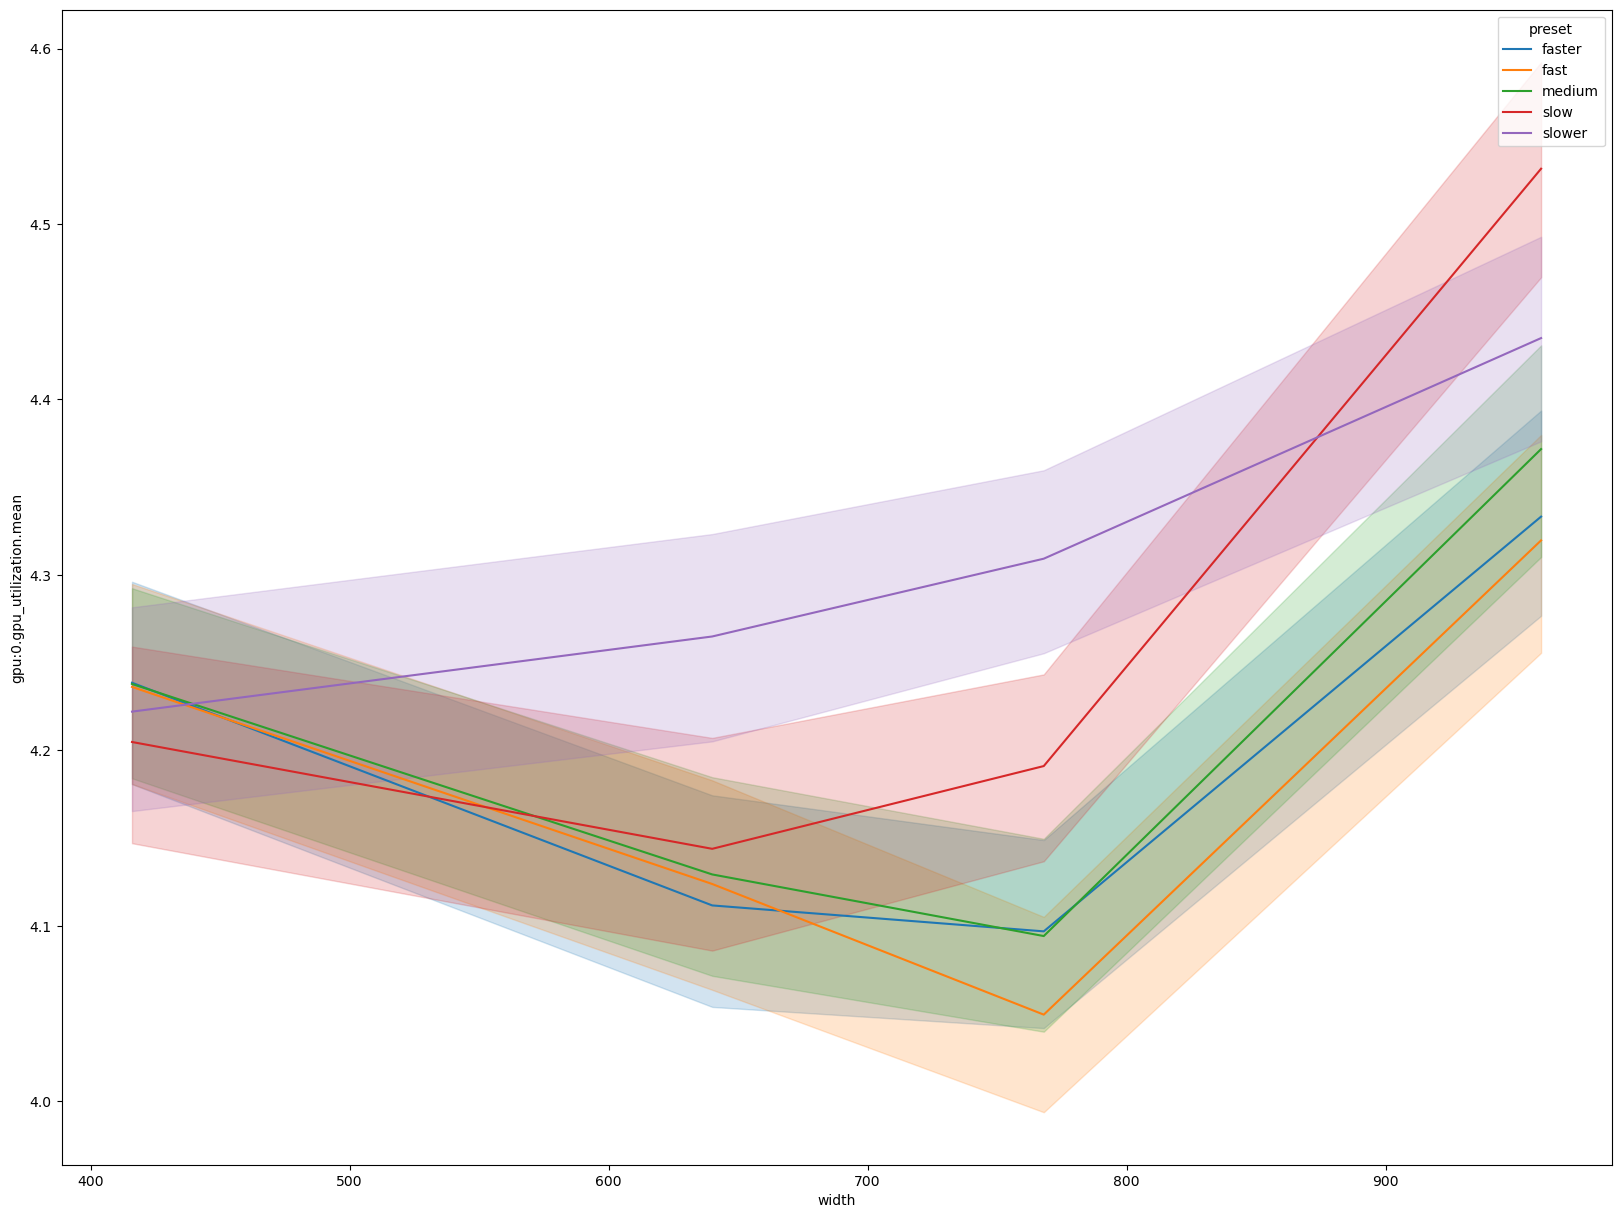

In [218]:
plt.figure(figsize=(20, 15))
sns.lineplot(data=h264_encoding_results.filter(pl.col('width') < 1200), x='width', y='gpu:0.gpu_utilization.mean', hue='preset',)

<Axes: xlabel='width', ylabel='gpu:0.gpu_utilization.mean'>

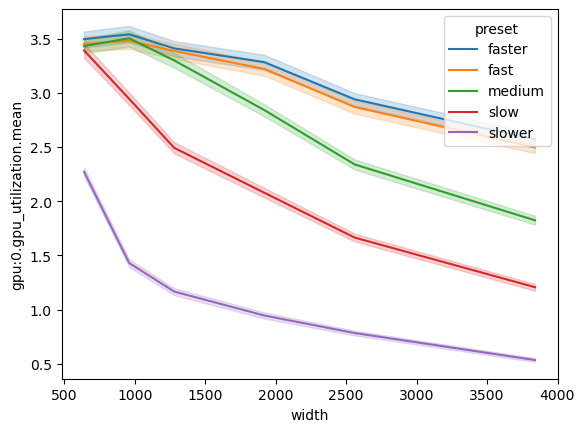

In [282]:
sns.lineplot(data=h265_encoding_results.filter(pl.col('bitrate') < 999000), x='width', y='gpu:0.gpu_utilization.mean', hue='preset')

<Axes: xlabel='width', ylabel='gpu_energy'>

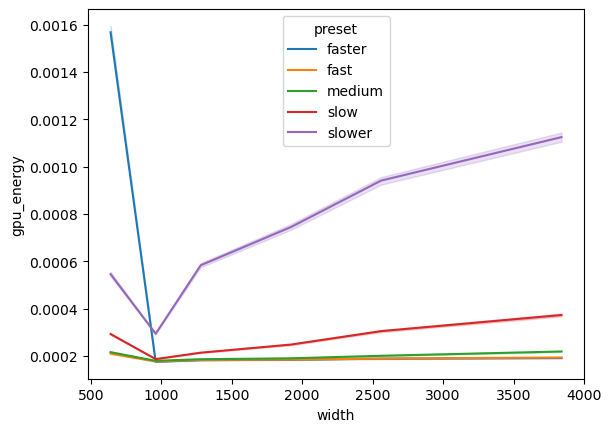

In [283]:
sns.lineplot(data=h265_encoding_results.filter(pl.col('bitrate') < 999000), x='width', y='gpu_energy', hue='preset')

<Axes: xlabel='width', ylabel='duration'>

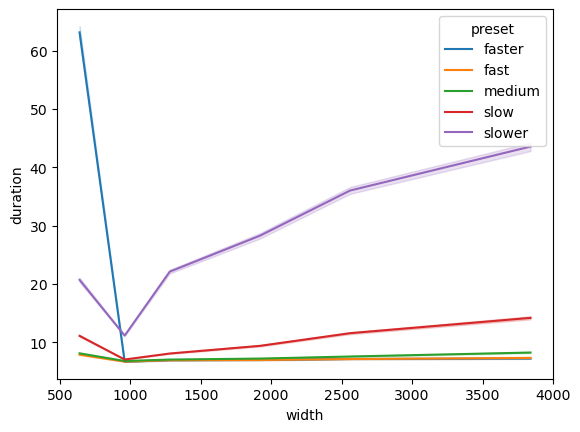

In [284]:
sns.lineplot(data=h265_encoding_results.filter(pl.col('bitrate') < 999000), x='width', y='duration', hue='preset')

In [164]:
h264_encoding_results.filter(pl.col('bitrate') > 500)

,timestamp,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,cpu_energy,gpu_energy,ram_energy,energy_consumed,cpu_count,cpu_model,gpu_count,gpu_model,ram_total_size,host.cpu_percent.mean,host.cpu_percent.min,host.cpu_percent.max,host.cpu_percent.last,host.memory_percent.mean,host.memory_percent.min,host.memory_percent.max,host.memory_percent.last,host.swap_percent.mean,host.swap_percent.min,host.swap_percent.max,host.swap_percent.last,host.memory_used.GiB.mean,host.memory_used.GiB.min,host.memory_used.GiB.max,host.memory_used.GiB.last,host.load_average.1min.mean,host.load_average.1min.min,host.load_average.1min.max,host.load_average.1min.last,…,gpu:1.memory_total.MiB.mean,gpu:1.memory_total.MiB.min,gpu:1.memory_total.MiB.max,gpu:1.memory_total.MiB.last,gpu:1.memory_percent.mean,gpu:1.memory_percent.min,gpu:1.memory_percent.max,gpu:1.memory_percent.last,gpu:1.gpu_utilization.mean,gpu:1.gpu_utilization.min,gpu:1.gpu_utilization.max,gpu:1.gpu_utilization.last,gpu:1.memory_utilization.mean,gpu:1.memory_utilization.min,gpu:1.memory_utilization.max,gpu:1.memory_utilization.last,gpu:1.fan_speed.mean,gpu:1.fan_speed.min,gpu:1.fan_speed.max,gpu:1.fan_speed.last,gpu:1.temperature.mean,gpu:1.temperature.min,gpu:1.temperature.max,gpu:1.temperature.last,gpu:1.power_usage.mean,gpu:1.power_usage.min,gpu:1.power_usage.max,gpu:1.power_usage.last,duration.s,last_timestamp,preset,codec,bitrate,width,height,video_name,output_path
i64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,str,i64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,str,str
6,"""2023-09-29T18:…",6.305239,0.000109,0.000017,198.215558,96.639,377.875335,0.000371,0.000173,0.000652,0.001195,256,"""AMD EPYC 7713 …",2,"""2 x NVIDIA RTX…",1007.667561,2.578126,0.5,3.5,2.8,1.391841,1.3,1.4,1.4,0.0,0.0,0.0,0.0,8.965883,8.186584,9.139992,8.838215,0.984302,0.98,0.99,0.99,…,49140.0,49140.0,49140.0,49140.0,0.9,0.9,0.9,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,30.0,30.0,30.0,34.0,34.0,34.0,34.0,22.060853,19.656,27.987,19.724,6.157132,1.6960e9,"""faster""","""h264""",1100.0,768.0,432.0,"""AncientThought…","""h264/AncientTh…"
7,"""2023-09-29T18:…",6.165742,0.000107,0.000017,209.00989,96.54,377.875335,0.00037,0.000164,0.000639,0.001172,256,"""AMD EPYC 7713 …",2,"""2 x NVIDIA RTX…",1007.667561,2.619776,0.5,3.8,2.3,1.391941,1.3,1.4,1.4,0.0,0.0,0.0,0.0,9.023705,8.222107,9.167892,9.039703,0.99,0.99,0.99,0.99,…,49140.0,49140.0,49140.0,49140.0,0.9,0.9,0.9,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,30.0,30.0,30.0,34.0,34.0,34.0,34.0,22.301107,19.867,28.193,19.867,6.238996,1.6960e9,"""faster""","""h264""",1100.0,768.0,432.0,"""AncientThought…","""h264/AncientTh…"
8,"""2023-09-29T18:…",6.181758,0.000107,0.000017,209.237432,96.509,377.875335,0.000366,0.00017,0.000639,0.001176,256,"""AMD EPYC 7713 …",2,"""2 x NVIDIA RTX…",1007.667561,2.355669,0.5,3.1,2.8,1.38064,1.3,1.4,1.3,0.0,0.0,0.0,0.0,8.953788,8.23772,9.18111,8.281525,0.99,0.99,0.99,0.99,…,49140.0,49140.0,49140.0,49140.0,0.9,0.9,0.9,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,30.0,30.0,30.0,34.0,34.0,34.0,34.0,22.731179,19.739,28.199,19.739,6.209912,1.6960e9,"""faster""","""h264""",1100.0,768.0,432.0,"""AncientThought…","""h264/AncientTh…"
9,"""2023-09-29T18:…",6.169406,0.000107,0.000017,209.602063,96.818,377.875335,0.00037,0.000165,0.000638,0.001172,256,"""AMD EPYC 7713 …",2,"""2 x NVIDIA RTX…",1007.667561,1.611223,0.5,2.5,1.1,1.391969,1.3,1.4,1.4,0.0,0.0,0.0,0.0,9.081448,8.256973,9.268951,9.198792,1.050755,0.99,1.07,1.07,…,49140.0,49140.0,49140.0,49140.0,0.9,0.9,0.9,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,30.0,30.0,30.0,34.0,34.0,34.0,34.0,22.816343,19.866,28.289,19.866,6.262502,1.6960e9,"""faster""","""h264""",2000.0,960.0,540.0,"""AncientThought…","""h264/AncientTh…"
10,"""2023-09-29T18:…",6.250679,0.000109,0.000017,211.554989,97.138,377.875335,0.000377,0.0001

In [253]:
# h264_encoding_results['duration'].max()
h265 = h265_encoding_results.filter(pl.col('duration')>80)['video_name'].to_list()
h265 = sorted(h265)

h264 = h264_encoding_results.filter(pl.col('duration') > 8.5)['video_name'].to_list()
h264 = sorted(h264)
len(h264)


244

In [255]:
for a, b in zip(h265, h264):
    print(f'h265: {a} -- h264: {b}')

h265: AncientThought_s001.265 -- h264: AncientThought_s011.265
h265: AncientThought_s001.265 -- h264: AncientThought_s014.265
h265: AncientThought_s002.265 -- h264: AncientThought_s022.265
h265: AncientThought_s002.265 -- h264: AncientThought_s023.265
h265: AncientThought_s003.265 -- h264: AncientThought_s024.265
h265: AncientThought_s003.265 -- h264: Basketball_s001.265
h265: AncientThought_s004.265 -- h264: Bosohorus_s000.265
h265: AncientThought_s010.265 -- h264: Bosohorus_s000.265
h265: AncientThought_s022.265 -- h264: Bosohorus_s000.265
h265: AncientThought_s022.265 -- h264: BundNightScape_s000.265
h265: AncientThought_s023.265 -- h264: BundNightScape_s000.265
h265: AncientThought_s023.265 -- h264: CampfireParty_s001.265
h265: AncientThought_s024.265 -- h264: Characters_s000.265
h265: AncientThought_s024.265 -- h264: Eldorado_s000.265
h265: AncientThought_s025.265 -- h264: Eldorado_s001.265
h265: AncientThought_s026.265 -- h264: Eldorado_s003.265
h265: Basketball_s001.265 -- h264:

In [258]:
high = set(h264).intersection(set(h265))

In [274]:
def get_fps(output_path: str) -> str:
    return output_path.split('/')[-1]

In [270]:
# encoding_results.filter(pl.col('video_name').is_in(high))

'15fps'

In [273]:
encoding_results.


,timestamp,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,cpu_energy,gpu_energy,ram_energy,energy_consumed,cpu_count,cpu_model,gpu_count,gpu_model,ram_total_size,host.cpu_percent.mean,host.cpu_percent.min,host.cpu_percent.max,host.cpu_percent.last,host.memory_percent.mean,host.memory_percent.min,host.memory_percent.max,host.memory_percent.last,host.swap_percent.mean,host.swap_percent.min,host.swap_percent.max,host.swap_percent.last,host.memory_used.GiB.mean,host.memory_used.GiB.min,host.memory_used.GiB.max,host.memory_used.GiB.last,host.load_average.1min.mean,host.load_average.1min.min,host.load_average.1min.max,host.load_average.1min.last,…,gpu:1.memory_total.MiB.min,gpu:1.memory_total.MiB.max,gpu:1.memory_total.MiB.last,gpu:1.memory_percent.mean,gpu:1.memory_percent.min,gpu:1.memory_percent.max,gpu:1.memory_percent.last,gpu:1.gpu_utilization.mean,gpu:1.gpu_utilization.min,gpu:1.gpu_utilization.max,gpu:1.gpu_utilization.last,gpu:1.memory_utilization.mean,gpu:1.memory_utilization.min,gpu:1.memory_utilization.max,gpu:1.memory_utilization.last,gpu:1.fan_speed.mean,gpu:1.fan_speed.min,gpu:1.fan_speed.max,gpu:1.fan_speed.last,gpu:1.temperature.mean,gpu:1.temperature.min,gpu:1.temperature.max,gpu:1.temperature.last,gpu:1.power_usage.mean,gpu:1.power_usage.min,gpu:1.power_usage.max,gpu:1.power_usage.last,duration.s,last_timestamp,preset,codec,bitrate,width,height,video_name,output_path,fps
i64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,str,i64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,str,str,str
0,"""2023-09-29T18:…",6.236857,0.000115,0.000018,205.294077,151.198,377.875335,0.000357,0.000264,0.000647,0.001268,256,"""AMD EPYC 7713 …",2,"""2 x NVIDIA RTX…",1007.667561,1.978338,0.0,3.7,0.0,1.380825,1.3,1.4,1.3,0.0,0.0,0.0,0.0,8.7379,7.998234,8.962353,8.008442,0.713782,0.68,0.74,0.68,…,49140.0,49140.0,49140.0,0.9,0.9,0.9,0.9,0.110451,0.0,1.0,1.0,0.0,0.0,0.0,0.0,30.0,30.0,30.0,30.0,35.321197,35.0,36.0,35.0,19.358513,8.197,27.979,20.214,6.235533,1.6960e9,"""faster""","""h264""",145.0,416.0,234.0,"""AncientThought…","""h264/AncientTh…","""h264/AncientTh…"
1,"""2023-09-29T18:…",6.235156,0.000107,0.000017,204.729853,97.266,377.875335,0.000351,0.000174,0.000647,0.001172,256,"""AMD EPYC 7713 …",2,"""2 x NVIDIA RTX…",1007.667561,1.625634,0.1,3.1,0.1,1.379923,1.3,1.4,1.3,0.0,0.0,0.0,0.0,8.748247,8.035385,8.977695,8.035465,0.641887,0.63,0.68,0.63,…,49140.0,49140.0,49140.0,0.9,0.9,0.9,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,30.0,30.0,30.0,35.0,35.0,35.0,35.0,21.991378,19.658,24.973,20.421,6.327652,1.6960e9,"""faster""","""h264""",145.0,416.0,234.0,"""AncientThought…","""h264/AncientTh…","""h264/AncientTh…"
2,"""2023-09-29T18:…",6.234489,0.000106,0.000017,203.241256,97.176,377.875335,0.000348,0.000168,0.000647,0.001163,256,"""AMD EPYC 7713 …",2,"""2 x NVIDIA RTX…",1007.667561,1.738798,0.4,2.4,1.7,1.391919,1.3,1.4,1.4,0.0,0.0,0.0,0.0,8.883196,8.062706,9.028725,8.86031,0.748755,0.74,0.76,0.76,…,49140.0,49140.0,49140.0,0.9,0.9,0.9,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,30.0,30.0,30.0,35.0,35.0,35.0,35.0,22.483857,19.753,28.095,19.761,6.242571,1.6960e9,"""faster""","""h264""",145.0,416.0,234.0,"""AncientThought…","""h264/AncientTh…","""h264/AncientTh…"
3,"""2023-09-29T18:…",6.246922,0.000105,0.000017,190.141209,97.062,377.875335,0.00035,0.000157,0.000649,0.001156,256,"""AMD EPYC 7713 …",2,"""2 x NVIDIA RTX…",1007.667561,1.787124,0.1,2.6,0.1,1.380316,1.3,1.4,1.3,0.0,0.0,0.0,0.0,8.830501,8.121868,9.072525,8.128757,0.78683,0.76,0.88,0.88,…,49140.0,49140.0,49140.0,0.9,0.9,0.9,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,30.0,30.0,30.0,34.51498,34.0,35.0,35.0,22.069863,19.56,28.005,20.315,6.291826,1.6960e9,"""faster""","""h264""",365.0,640.0,360.0,"""AncientThought…","""h264/AncientTh…","""h264/AncientTh…"
4,"""2023-09-29T18:…",6.337089,0.000108,0.000017,1